<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
path_filename = '/home/mcc/Dropbox/01-Magni-mind/1-WHO-life-expectancy/groupby_test/Life_Expectancy_Data.csv'

# Clean column names
column_names = ['Country','Year','Status','LifeExpectancy','AdultMort',
                'InfD','EtOH','PercExpen','HepB','Measles',
                'BMI','lt5yD','Polio','TotalExpen','DTP','HIV',
                'GDP','Population','Thin1_19y','Thin5_9y','Income',
                'Education']

df = pd.read_csv(path_filename, 
                 names=column_names, 
                 header=0)

In [3]:
# Drop 10 rows with no Life Expectancy data.
# NOTE 10 rows deleted with delelte 10 countries
df.dropna(subset=['LifeExpectancy'], inplace=True) 

# These three vars have missing values greater than 15% per feature.
df.drop(['Population', 'HepB', 'GDP'], axis=1, inplace=True)

# Since these seem missing missing at random, simply impute the values with the column mean.
df['AdultMort'].fillna(np.mean(df.AdultMort), inplace=True)
df['InfD'].fillna(np.mean(df.InfD), inplace=True)
df['EtOH'].fillna(np.mean(df.EtOH), inplace=True)
df['PercExpen'].fillna(np.mean(df.PercExpen), inplace=True)
df['Measles'].fillna(np.mean(df.Measles), inplace=True)
df['BMI'].fillna(np.mean(df.BMI), inplace=True)
df['Polio'].fillna(np.mean(df.Polio), inplace=True)
df['TotalExpen'].fillna(np.mean(df.TotalExpen), inplace=True)
df['DTP'].fillna(np.mean(df.DTP), inplace=True)
df['Thin1_19y'].fillna(np.mean(df.Thin1_19y), inplace=True)
df['Thin5_9y'].fillna(np.mean(df.Thin5_9y), inplace=True)
df['Income'].fillna(np.mean(df.Income), inplace=True)
df['Education'].fillna(np.mean(df.Education), inplace=True)

# Convert Dev status to a binary variable, where Developing Nations = 0, Developed Nation status = 1.
df['Status'] = df['Status'].apply(lambda x: 0 if x == 'Developing' else 1).astype('int8')

In [4]:
print('\nShape of Cleaned and Imputed dataframe:', df.shape)
      
df.isnull().sum()


Shape of Cleaned and Imputed dataframe: (2928, 19)


Country           0
Year              0
Status            0
LifeExpectancy    0
AdultMort         0
InfD              0
EtOH              0
PercExpen         0
Measles           0
BMI               0
lt5yD             0
Polio             0
TotalExpen        0
DTP               0
HIV               0
Thin1_19y         0
Thin5_9y          0
Income            0
Education         0
dtype: int64

In [5]:
# group the data by country
grouped = df.groupby("Country")
grouped

In [22]:
col_width = df["Country"].str.len().max()

col_width

52

In [29]:
print('\nThe growth rate for each country is calculated and listed below.\n')
print('Country, Growth Rate, Rate-Slope, Mean Life Expectancy\n')
print('-'*70)

col_width = df["Country"].str.len().max()

for name, group in grouped:
    # get the year and life expectancy values for this country
    Year = group["Year"].values.reshape(-1, 1)
    LifeExpectancy = group["LifeExpectancy"].values.reshape(-1, 1)
    MeanAge = np.mean(group["LifeExpectancy"])
    
    # fit a linear regression model
    model = LinearRegression().fit(Year, LifeExpectancy)
    
    # get the slope of the fitted line
    slope = model.coef_[0][0]

    #check if the slope is positive (increasing) or negative (decreasing){num:.3}
    print(f"{name}{' '*(col_width-len(name))} is {'Increasing' if slope > 0 else 'Decreasing'}, {slope:.3}, \t{MeanAge:.3}")


The growth rate for each country is calculated and listed below.

Country, Growth Rate, Rate-Slope, Mean Life Expectancy

----------------------------------------------------------------------
Afghanistan                                          is Increasing, 0.45, 	58.2
Albania                                              is Increasing, 0.371, 	75.2
Algeria                                              is Increasing, 0.321, 	73.6
Angola                                               is Increasing, 0.531, 	49.0
Antigua and Barbuda                                  is Increasing, 0.188, 	75.1
Argentina                                            is Increasing, 0.163, 	75.2
Armenia                                              is Increasing, 0.166, 	73.4
Australia                                            is Increasing, 0.127, 	81.8
Austria                                              is Increasing, 0.427, 	81.5
Azerbaijan                                           is Increasing, 0.447, 	70

In [10]:
# loop through each group (i.e. country)
for name, group in grouped:
    # get the year and life expectancy values for this country
    Year = group["Year"].values.reshape(-1, 1)
    LifeExpectancy = group["LifeExpectancy"].values.reshape(-1, 1)
    MeanAge = np.mean(group["LifeExpectancy"])
    
    # fit a linear regression model
    model = LinearRegression().fit(Year, LifeExpectancy)
    
    # get the slope of the fitted line
    slope = model.coef_[0][0]

    #check if the slope is positive (increasing) or negative (decreasing)
    if slope > 0:
       pass
    else:
       print(f"{name} is Decreasing, slope={slope:.3}, Age={MeanAge:.3}")

Grenada is Decreasing, slope=-0.131, Age=73.3
Iceland is Decreasing, slope=-0.024, Age=82.4
Libya is Decreasing, slope=-0.0329, Age=72.5
Romania is Decreasing, slope=-0.0597, Age=74.1
Saint Vincent and the Grenadines is Decreasing, slope=-0.292, Age=73.5
Samoa is Decreasing, slope=-0.0525, Age=73.6
Somalia is Decreasing, slope=-0.0575, Age=53.3
Syrian Arab Republic is Decreasing, slope=-0.635, Age=70.8


In [11]:
# Save country stats
columns = ['Country','RateOfChange','LifeExpectancy']
df = pd.DataFrame(columns=columns)

# loop through each group (i.e. country)
for name, group in grouped:
    # get the year and life expectancy values for this country
    Year = group["Year"].values.reshape(-1, 1)
    LifeExpectancy = group["LifeExpectancy"].values.reshape(-1, 1)
    MeanAge = np.mean(group["LifeExpectancy"])
    
    # fit a linear regression model
    model = LinearRegression().fit(Year, LifeExpectancy)
    
    # get the slope of the fitted line
    slope = model.coef_[0][0]
    
    # append country info
    df.loc[len(df.index)] = [name, slope, MeanAge] 
    
    
df.head()

,Country,RateOfChange,LifeExpectancy
0,Afghanistan,0.450147,58.19375
1,Albania,0.371029,75.15625
2,Algeria,0.321029,73.61875
3,Angola,0.530735,49.01875
4,Antigua and Barbuda,0.187794,75.05625


In [12]:
df_sorted = df.sort_values(by=['RateOfChange'])
df_sorted.head(10)

,Country,RateOfChange,LifeExpectancy
158,Syrian Arab Republic,-0.634706,70.85000
136,Saint Vincent and the Grenadines,-0.292353,73.47500
65,Grenada,-0.131029,73.29375
132,Romania,-0.059706,74.05000
148,Somalia,-0.057500,53.31875
137,Samoa,-0.052500,73.61875
94,Libya,-0.032941,72.48750
73,Iceland,-0.023971,82.44375
124,Paraguay,0.030588,73.11250
103,Mauritania,0.031471,62.80000


In [30]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RateOfChange,183.0,0.351231,0.290723,-0.634706,0.162794,0.272794,0.47875,1.500588
LifeExpectancy,183.0,69.224932,9.186432,46.112500,62.475000,72.487500,75.10625,82.537500


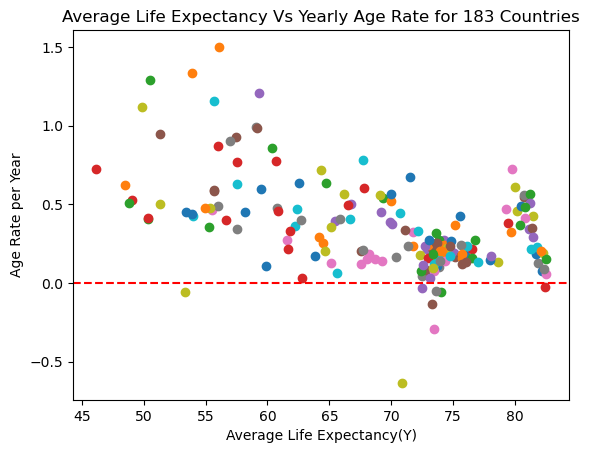

In [15]:
# loop through each group (i.e. country)
for name, group in grouped:
    # get the year and life expectancy values for this country
    Year = group["Year"].values.reshape(-1, 1)
    LifeExpectancy = group["LifeExpectancy"].values.reshape(-1, 1)
    MeanAge = np.mean(group["LifeExpectancy"])
    
    # fit a linear regression model
    model = LinearRegression().fit(Year, LifeExpectancy)
    
    # get the slope of the fitted line
    slope = model.coef_[0][0]

    # check if the slope is positive (increasing) or negative (decreasing)
    #if slope > 0:
    #    print(f"{name} is Increasing, coeff={model.coef_}, Age={MeanAge}")
    #else:
    #    print(f"{name} is Decreasing, coeff={model.coef_}, Age={MeanAge}")
           
    # plot the life expectancy over time for this country
    plt.scatter(MeanAge, slope, label=name)
    
# add a legend and show the plot
plt.axhline(y=0, color='red', linestyle='--')
plt.legend().remove()
plt.title("Average Life Expectancy Vs Yearly Age Rate for 183 Countries")
plt.xlabel('Average Life Expectancy(Y)')
plt.ylabel('Age Rate per Year')
plt.show()    